# Importing Required Libraries

In [2]:
# !pip install prophet

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv("train_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [4]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

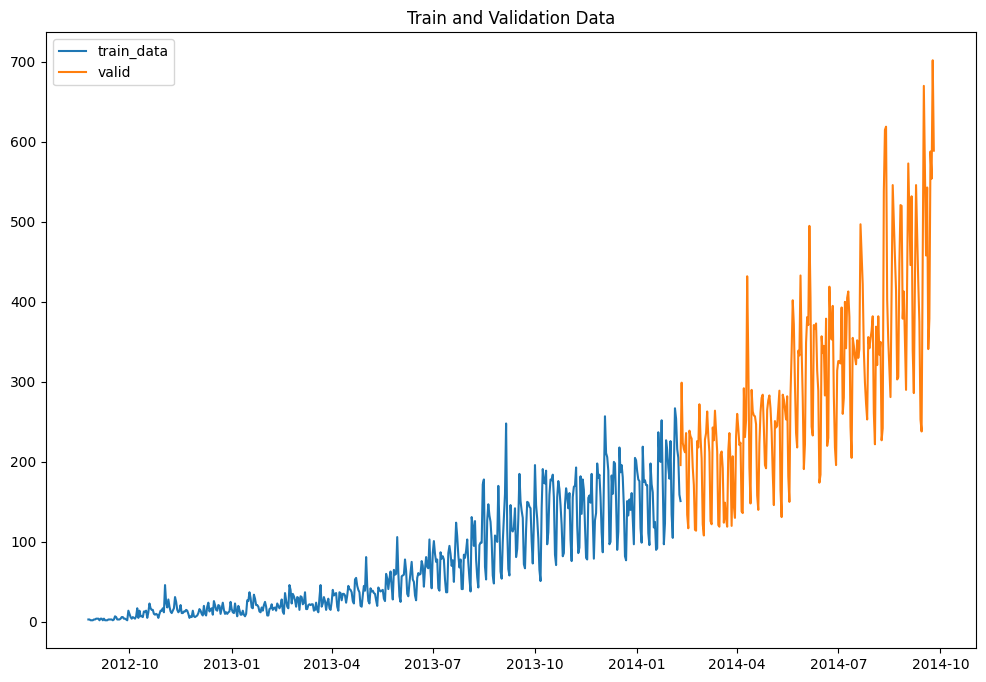

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Prophet

In [11]:
# !pip install prophet

In [12]:
from prophet import Prophet

In [8]:
train_data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [13]:
df = train_data[['Date', 'count']]

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [14]:
df.head()

,ds,y
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


14:37:19 - cmdstanpy - INFO - Chain [1] start processing
14:37:19 - cmdstanpy - INFO - Chain [1] done processing


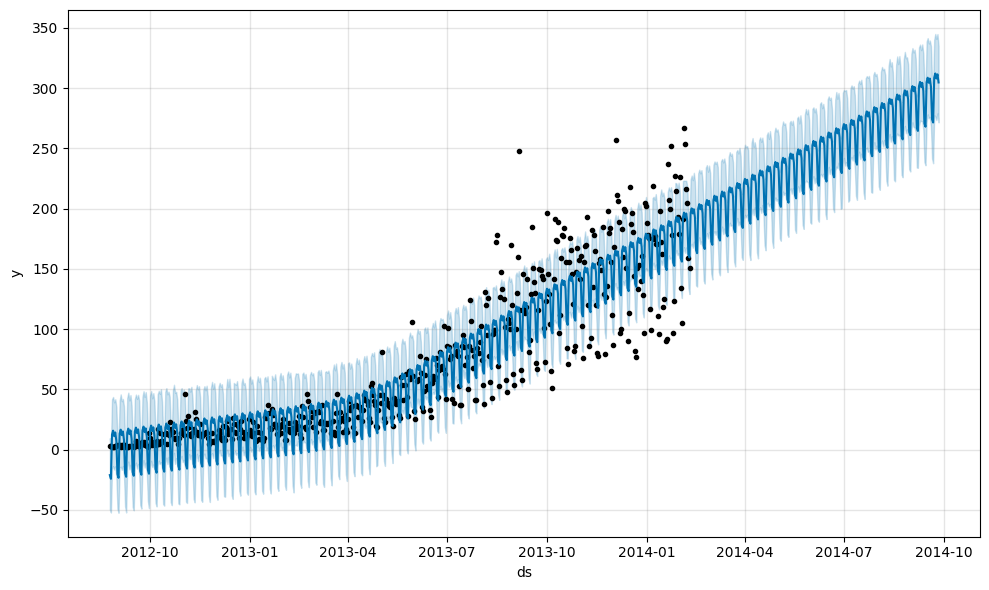

In [16]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=len(valid_data),freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

In [17]:
train_data.shape, valid_data.shape

((534, 2), (229, 2))

In [22]:
len(forecast['yhat'][534:].values)

229

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,1.838100,-49.664074,9.549539,1.838100,1.838100,-22.990212,-22.990212,-22.990212,-22.990212,-22.990212,-22.990212,0.0,0.0,0.0,-21.152112
1,2012-08-26,1.958965,-52.225684,2.914226,1.958965,1.958965,-26.178685,-26.178685,-26.178685,-26.178685,-26.178685,-26.178685,0.0,0.0,0.0,-24.219719
2,2012-08-27,2.079831,-15.842889,41.803381,2.079831,2.079831,10.406729,10.406729,10.406729,10.406729,10.406729,10.406729,0.0,0.0,0.0,12.486560
3,2012-08-28,2.200696,-13.716312,43.699281,2.200696,2.200696,13.536511,13.536511,13.536511,13.536511,13.536511,13.536511,0.0,0.0,0.0,15.737207
4,2012-08-29,2.321561,-16.552765,39.222584,2.321561,2.321561,8.824060,8.824060,8.824060,8.824060,8.824060,8.824060,0.0,0.0,0.0,11.145622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2014-09-22,298.144973,277.370684,340.227220,284.613593,311.307582,10.406729,10.406729,10.406729,10.406729,10.406729,10.406729,0.0,0.0,0.0,308.551702
759,2014-09-23,298.644782,276.699720,344.990229,284.992028,311.952282,13.536511,13.536511,13.536511,13.536511,13.536511,13.536511,0.0,0.0,0.0,312.181292
760,2014-09-24,299.144590,273.500826,340.933947,285.370980,312.577643,8.824060,8.824060,8.824060,8.824060,8.824060,8.824060,0.0,0.0,0.0,307.968650
761,2014-09-25,299.644398,279.018178,344.888880,285.755253,313.178619,11.821401,11.821401,11.821401,11.821401,11.821401,11.821401,0.0,0.0,0.0,311.465799


In [23]:
valid_data['prophet'] =  forecast['yhat'][534:].values

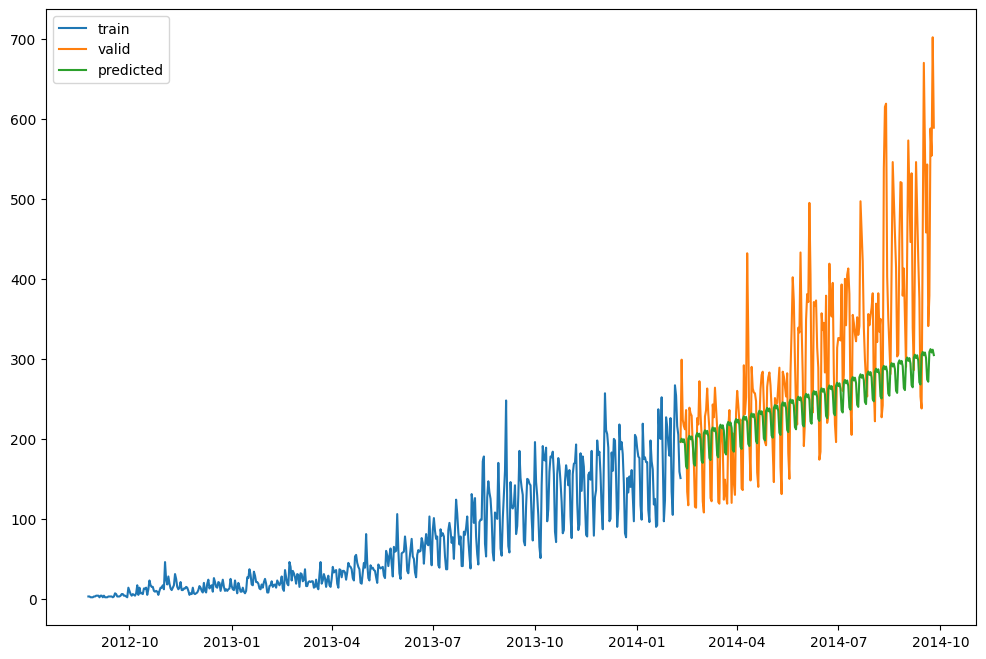

In [24]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [25]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['prophet']))
print('The RMSE value for Prophet is', rmse)

The RMSE value for Prophet is 110.32490624703006


In [26]:
forecast.index= forecast.ds

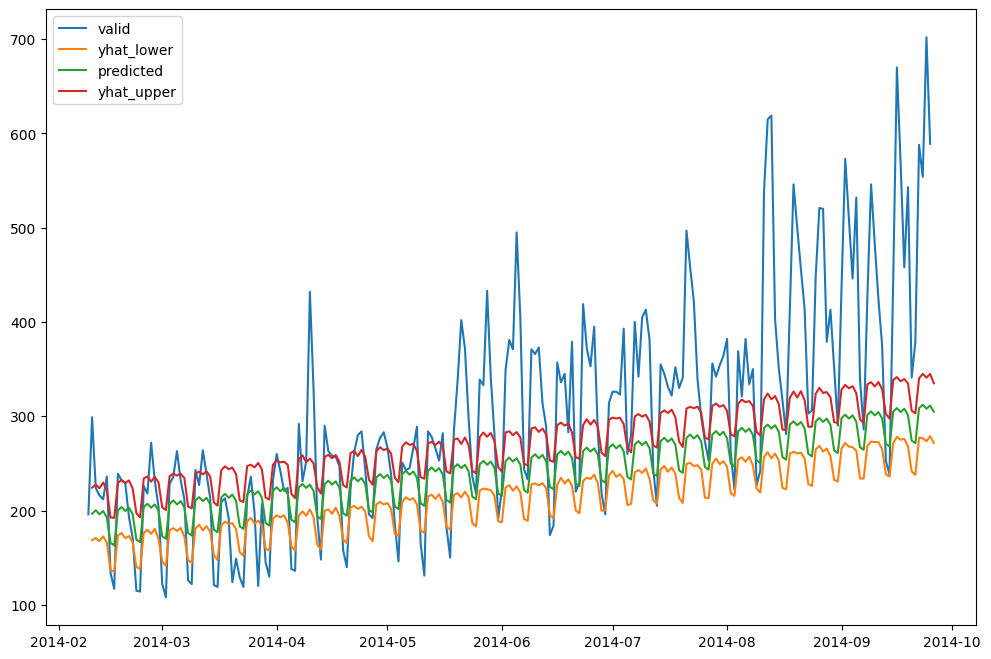

In [29]:
plt.figure(figsize=(12,8))

plt.plot(valid_data['count'],  label='valid') 
plt.plot(forecast['yhat_lower'][534:],  label='yhat_lower') 
plt.plot(forecast['yhat'][534:],  label='predicted') 
plt.plot(forecast['yhat_upper'][534:],  label='yhat_upper') 

plt.legend(loc='best') 
plt.show()